In [236]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import catboost as ctb

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder

import plotly.express as px

# 1. ESTRUCTURA DE DATOS

In [237]:
df_bmw = pd.read_csv("Dataset/bmw_pricing_v3.csv")

In [238]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [239]:
len(df_bmw)

4843

In [240]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [241]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [242]:
df_bmw.shape

(4843, 18)

# 2. DATA CLEANING

## 2.1 ANALISIS DUPLICADOS

In [243]:
#Observo si hay duplicados y veo que no hay duplicados


df_bmw[df_bmw.duplicated(keep = False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


## 2.2 TRATAMIENTO DE NULOS

In [244]:
df_bmw.isnull().any()

marca                           True
modelo                          True
km                              True
potencia                        True
fecha_registro                  True
tipo_gasolina                   True
color                           True
tipo_coche                      True
volante_regulable               True
aire_acondicionado              True
camara_trasera                  True
asientos_traseros_plegables     True
elevalunas_electrico            True
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                          True
fecha_venta                     True
dtype: bool

In [245]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [246]:
df_bmw2 = df_bmw.copy()

In [247]:
#antes de empezar a analizar los nulos, quiero analizar  aquellas filas que tengan un numero elevado de nulos

nulos3 = 0
nulos4 = 0
nulos5 = 0
mas6nulos = 0

#calculo la cantidad de valores nulos por fila
nulos_por_fila = df_bmw2.isnull().sum(axis=1)

nulos3 = (nulos_por_fila == 3).sum()
nulos4 = (nulos_por_fila == 4).sum()
nulos5 = (nulos_por_fila == 5).sum()
mas6nulos = (nulos_por_fila >= 6).sum()

print(nulos3)
print(nulos4)
print(nulos5)
print(mas6nulos)


1264
458
91
10


In [248]:
#pese a que considero eliminar aquellas filas con más de 5 nulos, tras una exploración de los datos considero 
# que las variables a priori más importantes para precedir el precio estan (modelo, km, potencia, tipo_gasolina) y por lo tanto mejor no eliminarlas y buscar la mejor forma de quitar esos nulos

df_bmw2[nulos_por_fila >= 5]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
18,NaN,325,205474.0,145.0,2009-05-01,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
134,NaN,320,91931.0,135.0,NaN,diesel,NaN,NaN,False,False,False,NaN,True,NaN,True,False,12500.0,2018-07-01
173,BMW,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
202,NaN,318,170164.0,105.0,NaN,diesel,grey,NaN,False,True,False,NaN,False,NaN,True,True,800.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,NaN,X3,161321.0,120.0,NaN,diesel,grey,NaN,True,NaN,False,NaN,False,False,True,False,17300.0,2018-07-01
4688,NaN,X5,104817.0,190.0,NaN,diesel,NaN,NaN,True,True,False,NaN,False,False,True,True,32500.0,2018-08-01
4773,NaN,X3,174799.0,100.0,NaN,diesel,brown,NaN,True,True,False,NaN,False,NaN,True,False,18400.0,2018-09-01
4805,BMW,218 Active Tourer,35382.0,110.0,NaN,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01


### 2.1.1. "marca"

In [249]:
df_bmw2["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [250]:
#aunque haya nulos sé que es un dataset de BMW, por tanto, todos los coches tendran la misma marca y puedo eliminar la columna ya que no nos aportará información al modelo

del df_bmw2["marca"]


### 2.2.2. "modelo"

In [251]:
df_bmw2["modelo"].isnull().sum()

np.int64(3)

In [252]:
df_bmw2["modelo"].value_counts()

modelo
320                  752
520                  633
318                  568
X3                   438
116                  358
                    ... 
216                    1
220 Active Tourer      1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 76, dtype: int64

In [253]:
df_bmw2[df_bmw2["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [254]:
#elimino las dos filas que tiene nulo en modelo y tipo_coche ya que no tengo forma de aproximar que modelo será y creo que son variables importantes para predecir el precio

df_bmw2.drop(df_bmw2[(df_bmw2["modelo"].isnull()) & (df_bmw2["tipo_coche"].isnull())].index, inplace = True)

In [255]:
#Para los nulos puedo aproximarme al modelo de coche será por el tipo_coche

df_bmw2[df_bmw2["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01


In [256]:
#defino una función que automatice la moda del modelo para el tipo de coche por si entran nuevas filas con nulos en la variable "modelo"

def moda_modelo (x):
    return x.groupby("tipo_coche")["modelo"].agg(pd.Series.mode)

In [257]:
moda_modelo(df_bmw2)

tipo_coche
convertible                   Z4
coupe                        420
estate                       320
hatchback                    116
sedan                        520
subcompact                   116
suv                           X3
van            218 Active Tourer
Name: modelo, dtype: object

In [258]:
#sustituyo el nulo por la moda del modelo de coche según el tipo de coche con la función map

df_bmw2["modelo"] = df_bmw2["modelo"].fillna(df_bmw2["tipo_coche"].map(moda_modelo(df_bmw2))).astype(str) 

In [259]:
 #sin nulos en la variable modelo

df_bmw2["modelo"].isnull().sum()


np.int64(0)

### 2.2.3. "km"

In [260]:
media_km = df_bmw2["km"].mean()

In [261]:
df_bmw2[df_bmw2["km"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [262]:
#como son pocos nulos y las otras columnas son validas, decido aplicar la media de "km" 

df_bmw2["km"] = df_bmw2["km"].fillna(media_km)

In [263]:
 #sin nulos en la variable km

df_bmw2["km"].isnull().sum()

np.int64(0)

### 2.2.4. "potencia"

In [264]:
df_bmw2[df_bmw2["potencia"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01


In [265]:
def moda_potencia_modelo (x):
    return x.groupby("modelo")["potencia"].agg(pd.Series.mode)

In [266]:
moda_potencia_modelo(df_bmw2)

modelo
 Active Tourer    100.0
114                70.0
116                85.0
118               105.0
120               135.0
                  ...  
X6                225.0
X6 M              280.0
Z4                125.0
i3                 75.0
i8                170.0
Name: potencia, Length: 76, dtype: object

In [267]:
#sustityo el nulo por la moda de la potencia del modelo de modelo de coche con la función map

df_bmw2["potencia"] = df_bmw2["potencia"].fillna(df_bmw2["modelo"].map(moda_potencia_modelo(df_bmw2))).astype(float) #sustityo el nulo por la moda de la potencia del modelo de modelo de coche con la función map

/var/folders/pg/hrsy5wzd4jj5rwzr263ld0c40000gn/T/ipykernel_2560/2339890357.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw2["potencia"] = df_bmw2["potencia"].fillna(df_bmw2["modelo"].map(moda_potencia_modelo(df_bmw2))).astype(float) #sustityo el nulo por la moda de la potencia del modelo de modelo de coche con la función map


In [268]:
#sin nulos en la variable potencia

df_bmw2["potencia"].isnull().sum() 

np.int64(0)

### 2.2.5. "fecha_registro"

In [269]:
#valoro eliminarla ya que casi el 50% son nulos pero creo  que puede ser una variable importante para predecir el precio 
#por lo tanto busco darle un valor a los nulos basandonos en el tiempo de media que se tarda un coche en vender y restarlo a la fecha de venta
#convierto las columnas de fecha_registro y fecha_venta a datetime64[ns]

df_bmw2["fecha_registro"] = pd.to_datetime(df_bmw2["fecha_registro"])
df_bmw2["fecha_venta"] = pd.to_datetime(df_bmw2["fecha_venta"])

In [270]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4841 non-null   object        
 1   km                           4841 non-null   float64       
 2   potencia                     4841 non-null   float64       
 3   fecha_registro               2420 non-null   datetime64[ns]
 4   tipo_gasolina                4836 non-null   object        
 5   color                        4396 non-null   object        
 6   tipo_coche                   3383 non-null   object        
 7   volante_regulable            4837 non-null   object        
 8   aire_acondicionado           4355 non-null   object        
 9   camara_trasera               4839 non-null   object        
 10  asientos_traseros_plegables  1452 non-null   object        
 11  elevalunas_electrico         4839 non-null   obj

In [271]:
#creo una nueva columna para ver el tiempo que transcurre entre la fecha de registro y la venta

df_bmw2["dif_reg_venta"] = (df_bmw2["fecha_venta"] - df_bmw2["fecha_registro"]) / np.timedelta64(1,"D")


In [272]:
#calculo la media y la sustituyo por los nulos de la columna

media_dif_reg_venta = df_bmw2["dif_reg_venta"].mean() 


In [273]:
df_bmw2["dif_reg_venta"] = df_bmw2["dif_reg_venta"].fillna(media_dif_reg_venta) 

In [274]:
from datetime import timedelta

In [275]:
#convierto la columna a unidades de dias

df_bmw2["dif_reg_venta"] = pd.to_timedelta(df_bmw2["dif_reg_venta"], unit = "D") 

In [276]:
#para los nulos de la columna fecha_registro, resto la diferencia de dias desde la venta al registro

df_bmw2["fecha_registro"] = df_bmw2["fecha_registro"].fillna(df_bmw2["fecha_venta"] - df_bmw2["dif_reg_venta"])

In [277]:
#elimino el nulo que nos queda ya que nos falta información de las dos fechas y también el tipo de coche

df_bmw2.dropna(subset="fecha_registro", inplace = True)

In [278]:
#sin nulos en la variable fecha de registro

df_bmw2["fecha_registro"].isnull().sum() 

np.int64(0)

In [279]:
del df_bmw2["dif_reg_venta"]

### 2.2.6. "tipo_gasolina"

In [280]:
df_bmw2["tipo_gasolina"].isnull().sum()


np.int64(5)

In [281]:
df_bmw2[df_bmw2["tipo_gasolina"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2012-10-10 21:32:25.785123957,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01 00:00:00.000000000,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01 00:00:00.000000000,NaN,black,estate,True,True,False,NaN,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2012-09-12 21:32:25.785123957,NaN,white,NaN,False,True,False,NaN,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,2014-11-01 00:00:00.000000000,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01


In [282]:
#igual que en otras variables, sustituyo los nulos por la moda del tipo_gasolina según el modelo de coche

def moda_tipo_gasolina (x):
    return x.groupby("modelo")["tipo_gasolina"].agg(pd.Series.mode)

In [283]:
moda_tipo_gasolina(df_bmw2)

modelo
 Active Tourer                      diesel
114                                 diesel
116                                 diesel
118                                 diesel
120                                 diesel
                            ...           
X6                                  diesel
X6 M                                diesel
Z4                                  petrol
i3                [electro, hybrid_petrol]
i8                           hybrid_petrol
Name: tipo_gasolina, Length: 76, dtype: object

In [284]:
df_bmw2["tipo_gasolina"] = df_bmw2["tipo_gasolina"].fillna(df_bmw2["modelo"].map(moda_tipo_gasolina(df_bmw2)))

In [285]:
#sin nulos en la variable tipo_gasolina

df_bmw2["tipo_gasolina"].isnull().sum() 

np.int64(0)

### 2.2.7. "color"

In [286]:
df_bmw2[df_bmw2["color"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,2009-01-01 00:00:00.000000000,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,2009-05-01 00:00:00.000000000,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,318,196092.0,85.0,1995-10-01 00:00:00.000000000,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,2013-01-10 21:32:25.785123957,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,420,20996.0,135.0,2014-05-01 00:00:00.000000000,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,X4,61989.0,140.0,2014-12-01 00:00:00.000000000,diesel,NaN,NaN,False,False,False,NaN,False,NaN,False,True,28600.0,2018-09-01
4777,X5,285669.0,173.0,2007-08-01 00:00:00.000000000,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,9300.0,2018-09-01
4805,218 Active Tourer,35382.0,110.0,2012-09-12 21:32:25.785123957,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01
4818,X3,110039.0,130.0,2009-07-01 00:00:00.000000000,diesel,NaN,NaN,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01


In [287]:
df_bmw2["color"].value_counts()

color
black     1498
grey      1070
blue       647
white      483
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [288]:
def moda_color (x):
    return x.groupby("modelo")["color"].agg(pd.Series.mode)

In [289]:
moda_color(df_bmw2)

modelo
 Active Tourer    black
114               black
116               black
118               black
120                blue
                  ...  
X6                black
X6 M              black
Z4                black
i3                black
i8                 grey
Name: color, Length: 76, dtype: object

In [290]:
df_bmw2["color"] = df_bmw2["color"].fillna(df_bmw2["modelo"].map(moda_color(df_bmw2)))

In [291]:
#sin nulos en la variable color

df_bmw2["color"].isnull().sum() 

np.int64(0)

### 2.2.8. "tipo_coche"

In [292]:

df_bmw2[df_bmw2["tipo_coche"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
4,425,97097.0,160.0,2012-11-10 21:32:25.785123957,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,2011-05-01 00:00:00.000000000,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
11,325,228000.0,145.0,2012-10-10 21:32:25.785123957,diesel,black,NaN,True,True,False,False,True,False,True,NaN,13300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,216 Gran Tourer,48012.0,85.0,2016-02-01 00:00:00.000000000,diesel,blue,NaN,True,True,False,False,False,True,True,NaN,15600.0,2018-06-01
4834,218 Gran Tourer,47782.0,110.0,2013-02-09 21:32:25.785123957,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,2013-03-12 21:32:25.785123957,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01 00:00:00.000000000,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01


In [293]:
pd.set_option("display.max_rows", None)

In [294]:
#he valorado eliminar esta columna ya que intuia que el modelo de coche iba a ir muy relacionado con el tipo de coche, 
# pero veo que un mismo modelo puede tener más de un tipo de coche distinto y aplico la misma metodologia que en otras variables basandonos en la moda del modelo

df_bmw2.groupby("modelo")["tipo_coche"].value_counts()

modelo             tipo_coche 
 Active Tourer     van              1
114                hatchback        6
                   subcompact       4
116                hatchback      191
                   subcompact      56
                   sedan            3
                   estate           2
118                hatchback       79
                   subcompact      13
                   sedan            3
                   coupe            2
                   convertible      1
120                hatchback       16
                   convertible      4
                   subcompact       2
                   sedan            1
123                hatchback        1
125                hatchback        5
135                hatchback        2
                   convertible      1
                   coupe            1
214 Gran Tourer    van              1
216                van              1
216 Active Tourer  van              3
216 Gran Tourer    van              1
218                

In [295]:
pd.reset_option("display.max_rows")

In [296]:
def moda_tipo_coche (x):
    return x.groupby("modelo")["tipo_coche"].agg(pd.Series.mode)

In [297]:
df_bmw2["tipo_coche"] = df_bmw2["tipo_coche"].fillna(df_bmw2["modelo"].map(moda_tipo_coche(df_bmw2)))

In [298]:
#sin nulos en la variable tipo_coche

df_bmw2["tipo_coche"].isnull().sum() 


np.int64(0)

### 2.2.9. "volante_regulable"

In [299]:
df_bmw2[df_bmw2["volante_regulable"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,2013-01-01 00:00:00.000000000,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,2018-06-01
273,318,195032.0,100.0,2008-01-01 00:00:00.000000000,diesel,grey,estate,NaN,NaN,False,False,False,False,True,False,4900.0,2018-01-01
489,320,227691.0,135.0,2012-09-12 21:32:25.785123957,diesel,black,estate,NaN,True,False,False,False,True,True,False,10500.0,2018-02-01
614,318,201626.0,105.0,2013-10-01 00:00:00.000000000,diesel,black,estate,NaN,NaN,False,NaN,True,False,True,True,11700.0,2018-03-01


In [300]:
def moda_volante_regulable (x):
    return x.groupby("modelo")["volante_regulable"].agg(pd.Series.mode)

In [301]:
df_bmw2["volante_regulable"] = df_bmw2["volante_regulable"].fillna(df_bmw2["modelo"].map(moda_volante_regulable(df_bmw2))).astype(bool)

/var/folders/pg/hrsy5wzd4jj5rwzr263ld0c40000gn/T/ipykernel_2560/1701173739.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw2["volante_regulable"] = df_bmw2["volante_regulable"].fillna(df_bmw2["modelo"].map(moda_volante_regulable(df_bmw2))).astype(bool)


In [302]:
 #sin nulos en la variable volante_regulable

df_bmw2["volante_regulable"].isnull().sum()

np.int64(0)

### 2.2.10. "aire_acondicionado"

In [303]:
df_bmw2[df_bmw2["aire_acondicionado"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
12,420,132025.0,135.0,2014-03-01 00:00:00.000000000,diesel,blue,coupe,True,NaN,False,False,True,True,True,NaN,21700.0,2018-03-01
16,220,21167.0,135.0,2015-07-01 00:00:00.000000000,petrol,white,convertible,False,NaN,True,NaN,False,False,False,True,21900.0,2018-04-01
28,Z4,123809.0,125.0,2012-12-10 21:32:25.785123957,petrol,black,convertible,True,NaN,False,NaN,False,True,True,False,6500.0,2018-05-01
40,420,36696.0,120.0,2013-02-09 21:32:25.785123957,diesel,black,convertible,True,NaN,False,NaN,True,False,True,True,34300.0,2018-07-01
49,118,147180.0,100.0,2012-05-01 00:00:00.000000000,diesel,black,coupe,True,NaN,True,NaN,False,False,True,NaN,8400.0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,216 Active Tourer,193657.0,85.0,2015-03-01 00:00:00.000000000,diesel,silver,van,False,NaN,False,NaN,False,False,True,False,8900.0,2018-09-01
4818,X3,110039.0,130.0,2009-07-01 00:00:00.000000000,diesel,black,suv,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01
4820,Active Tourer,48380.0,100.0,2014-10-01 00:00:00.000000000,diesel,black,van,True,NaN,False,NaN,False,NaN,True,False,19000.0,2018-05-01
4834,218 Gran Tourer,47782.0,110.0,2013-02-09 21:32:25.785123957,diesel,blue,van,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01


In [304]:
def moda_aire_acondicionado (x):
    return df_bmw2.groupby("modelo")["aire_acondicionado"].agg(pd.Series.mode)

In [305]:
moda_aire_acondicionado (df_bmw2)

modelo
 Active Tourer       []
114               False
116                True
118                True
120                True
                  ...  
X6                 True
X6 M               True
Z4                False
i3                 True
i8                 True
Name: aire_acondicionado, Length: 76, dtype: object

In [306]:
df_bmw2["aire_acondicionado"] = df_bmw2["aire_acondicionado"].fillna(df_bmw2["modelo"].map(moda_aire_acondicionado(df_bmw2))).astype(bool)

In [307]:
#sin nulos en la variable volante_regulable

df_bmw2["aire_acondicionado"].isnull().sum() 

np.int64(0)

### 2.2.11. "camara_trasera"

In [308]:
df_bmw2[df_bmw2["camara_trasera"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,520,163675.0,135.0,2011-12-01 00:00:00.000000000,diesel,grey,estate,True,True,NaN,NaN,True,NaN,True,True,14900.0,2018-01-01
409,316,160619.0,85.0,2012-11-10 21:32:25.785123957,diesel,black,estate,False,True,NaN,NaN,True,NaN,True,NaN,11700.0,2018-04-01


In [309]:
def moda_camara_trasera (x):
    return df_bmw2.groupby("modelo")["camara_trasera"].agg(pd.Series.mode)

In [310]:
df_bmw2["camara_trasera"] = df_bmw2["camara_trasera"].fillna(df_bmw2["modelo"].map(moda_camara_trasera(df_bmw2))).astype(bool)

/var/folders/pg/hrsy5wzd4jj5rwzr263ld0c40000gn/T/ipykernel_2560/3245865837.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw2["camara_trasera"] = df_bmw2["camara_trasera"].fillna(df_bmw2["modelo"].map(moda_camara_trasera(df_bmw2))).astype(bool)


In [311]:
#sin nulos en la variable volante_regulable

df_bmw2["camara_trasera"].isnull().sum() 

np.int64(0)

### 2.2.12. "asientos_traseros_plegables"

In [312]:
df_bmw2["asientos_traseros_plegables"].isnull().sum()

np.int64(3388)

In [313]:
#como hay más del 50% de valores nulos la elimino

del(df_bmw2["asientos_traseros_plegables"])

### 2.2.13. "elevalunas_electrico"

In [314]:
df_bmw2["elevalunas_electrico"].isnull().sum()

np.int64(2)

In [315]:
df_bmw2[df_bmw2["elevalunas_electrico"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,2012-04-01 00:00:00.000000000,diesel,blue,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
305,535,148738.0,230.0,2012-08-12 21:32:25.785123957,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [316]:
def moda_elevalunas_trasero (x):
    return df_bmw2.groupby("modelo")["elevalunas_electrico"].agg(pd.Series.mode)

In [317]:
df_bmw2["elevalunas_electrico"] = df_bmw2["elevalunas_electrico"].fillna(df_bmw2["modelo"].map(moda_elevalunas_trasero(df_bmw2))).astype(bool)

/var/folders/pg/hrsy5wzd4jj5rwzr263ld0c40000gn/T/ipykernel_2560/1069685364.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw2["elevalunas_electrico"] = df_bmw2["elevalunas_electrico"].fillna(df_bmw2["modelo"].map(moda_elevalunas_trasero(df_bmw2))).astype(bool)


In [318]:
#sin nulos en la variable elevalunas_electrico

df_bmw2["elevalunas_electrico"].isnull().sum() 

np.int64(0)

### 2.2.14. "bluetooth" 

In [319]:
df_bmw2["bluetooth"].isnull().sum() 

np.int64(727)

In [320]:
df_bmw2["bluetooth"].value_counts()

bluetooth
False    3117
True      996
Name: count, dtype: int64

In [321]:
def moda_bluetooth (x):
    return x.groupby("modelo")["bluetooth"].agg(pd.Series.mode)

In [322]:
df_bmw2["bluetooth"] = df_bmw2["bluetooth"].fillna(df_bmw2["modelo"].map(moda_bluetooth(df_bmw2)))

In [323]:
df_bmw2["bluetooth"].value_counts()

bluetooth
False            3810
True             1026
[False, True]       1
[False, True]       1
[False, True]       1
[]                  1
Name: count, dtype: int64

In [324]:
df_bmw2["bluetooth"] = df_bmw2["bluetooth"].astype(str).str.strip()

In [325]:
df_bmw2["bluetooth"].value_counts()

bluetooth
False           3810
True            1026
[False True]       3
[]                 1
Name: count, dtype: int64

In [326]:
df_bmw2.drop(df_bmw2[df_bmw2["bluetooth"] == "[]"].index, inplace = True)


In [327]:
df_bmw2.drop(df_bmw2[df_bmw2["bluetooth"] == "[False True]"].index, inplace = True)

In [328]:
df_bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,hatchback,True,True,False,True,False,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,2012-09-12 21:32:25.785123957,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2012-09-12 21:32:25.785123957,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,2012-11-10 21:32:25.785123957,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01


In [329]:
df_bmw2["bluetooth"] = df_bmw2["bluetooth"].map({"True": True, "False": False})

In [330]:
df_bmw2["bluetooth"].value_counts()

bluetooth
False    3810
True     1026
Name: count, dtype: int64

In [331]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4836 non-null   object        
 1   km                    4836 non-null   float64       
 2   potencia              4836 non-null   float64       
 3   fecha_registro        4836 non-null   datetime64[ns]
 4   tipo_gasolina         4836 non-null   object        
 5   color                 4836 non-null   object        
 6   tipo_coche            4836 non-null   object        
 7   volante_regulable     4836 non-null   bool          
 8   aire_acondicionado    4836 non-null   bool          
 9   camara_trasera        4836 non-null   bool          
 10  elevalunas_electrico  4836 non-null   bool          
 11  bluetooth             4836 non-null   bool          
 12  gps                   4836 non-null   bool          
 13  alerta_lim_velocidad  4

In [332]:
 #sin nulos en la variable bluetooth

df_bmw2["bluetooth"].isnull().sum()

np.int64(0)

### 2.2.15. "gps"

In [333]:
#sin nulos en la variable gps

df_bmw2["gps"].isnull().sum() 

np.int64(0)

### 2.2.16. "alerta_lim_velocidad"

In [334]:
df_bmw2["alerta_lim_velocidad"].isnull().sum() 

np.int64(727)

In [335]:
df_bmw2["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2236
False    1873
Name: count, dtype: int64

In [336]:
def moda_alerta_lim_velocidad (x):
    return x.groupby("modelo")["alerta_lim_velocidad"].agg(pd.Series.mode)

In [337]:
moda_alerta_lim_velocidad(df_bmw2)

modelo
114     False
116     False
118     False
120     False
123      True
        ...  
X6       True
X6 M     True
Z4      False
i3       True
i8       True
Name: alerta_lim_velocidad, Length: 75, dtype: object

In [338]:
df_bmw2["alerta_lim_velocidad"] = df_bmw2["alerta_lim_velocidad"].fillna(df_bmw2["modelo"].map(moda_alerta_lim_velocidad(df_bmw2)))

In [339]:
df_bmw2["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True             2690
False            2142
[False, True]       2
[False, True]       1
[]                  1
Name: count, dtype: int64

In [340]:
df_bmw2["alerta_lim_velocidad"] = df_bmw2["alerta_lim_velocidad"].astype(str).str.strip()


In [341]:
df_bmw2["alerta_lim_velocidad"].value_counts()


alerta_lim_velocidad
True            2690
False           2142
[False True]       3
[]                 1
Name: count, dtype: int64

In [342]:
df_bmw2.drop(df_bmw2[df_bmw2["alerta_lim_velocidad"] == "[]"].index, inplace = True)
df_bmw2.drop(df_bmw2[df_bmw2["alerta_lim_velocidad"] == "[False True]"].index, inplace = True)

In [343]:
df_bmw2["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2690
False    2142
Name: count, dtype: int64

In [344]:
df_bmw2["alerta_lim_velocidad"] = df_bmw2["alerta_lim_velocidad"].map({"True": True, "False": False})

In [345]:
df_bmw2["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2690
False    2142
Name: count, dtype: int64

In [346]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4832 non-null   object        
 1   km                    4832 non-null   float64       
 2   potencia              4832 non-null   float64       
 3   fecha_registro        4832 non-null   datetime64[ns]
 4   tipo_gasolina         4832 non-null   object        
 5   color                 4832 non-null   object        
 6   tipo_coche            4832 non-null   object        
 7   volante_regulable     4832 non-null   bool          
 8   aire_acondicionado    4832 non-null   bool          
 9   camara_trasera        4832 non-null   bool          
 10  elevalunas_electrico  4832 non-null   bool          
 11  bluetooth             4832 non-null   bool          
 12  gps                   4832 non-null   bool          
 13  alerta_lim_velocidad  4

In [347]:
#sin nulos en la variable alerta_lim_velocidad

df_bmw2["alerta_lim_velocidad"].isnull().sum() 

np.int64(0)

### 2.2.17. "precio"

In [348]:
#como precio será nuestro target, simplemente elimino los nulos que haya ya que no queremos añadir datos que puedan modificar nuestra predicción

df_bmw2.dropna(subset="precio", inplace = True)


In [349]:
 #sin nulos en la variable precio

df_bmw2["precio"].isnull().sum()

np.int64(0)

### 2.2.18. "fecha_venta"

In [350]:
#sin nulos en la variable fecha_venta

df_bmw2["fecha_venta"].isnull().sum() 

np.int64(0)

In [351]:
df_bmw2.isnull().sum()

modelo                  0
km                      0
potencia                0
fecha_registro          0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

In [352]:
pd.to_pickle(df_bmw2, "df_bmw_sin nulos_PICKLE")

In [353]:
df_bmw2.describe()

,km,potencia,fecha_registro,precio,fecha_venta
count,4.826000e+03,4826.00000,4826,4826.000000,4826
mean,1.411054e+05,128.95690,2012-12-05 21:54:05.367208448,15821.632822,2018-04-26 13:27:25.586406912
min,-6.400000e+01,0.00000,1990-03-01 00:00:00,100.000000,2007-08-01 00:00:00
25%,1.030912e+05,100.00000,2012-10-10 21:32:25.785123840,10800.000000,2018-03-01 00:00:00
50%,1.411045e+05,120.00000,2013-01-10 21:32:25.785123840,14200.000000,2018-05-01 00:00:00
75%,1.752602e+05,135.00000,2013-07-01 00:00:00,18600.000000,2018-07-01 00:00:00
max,1.000376e+06,423.00000,2017-11-01 00:00:00,178500.000000,2018-09-01 00:00:00
std,6.010780e+04,38.96398,NaN,9218.908273,NaN


In [354]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4826 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4826 non-null   object        
 1   km                    4826 non-null   float64       
 2   potencia              4826 non-null   float64       
 3   fecha_registro        4826 non-null   datetime64[ns]
 4   tipo_gasolina         4826 non-null   object        
 5   color                 4826 non-null   object        
 6   tipo_coche            4826 non-null   object        
 7   volante_regulable     4826 non-null   bool          
 8   aire_acondicionado    4826 non-null   bool          
 9   camara_trasera        4826 non-null   bool          
 10  elevalunas_electrico  4826 non-null   bool          
 11  bluetooth             4826 non-null   bool          
 12  gps                   4826 non-null   bool          
 13  alerta_lim_velocidad  4

## 2.3. ANALISIS UNIVARIABLE

In [355]:
sns.set_theme(style = "white")
sns.despine(left = True, bottom = True)

plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False

#corro este codigo para que las visualizaciones tengan un determinado formato

<Figure size 640x480 with 0 Axes>

In [356]:
df_bmw3 = df_bmw2.copy()

In [357]:
df_bmw3 = df_bmw3.reset_index()

In [358]:
df_bmw3.head()

,index,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,0,118,140411.0,100.0,2012-02-01 00:00:00.000000000,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01
1,1,M4,13929.0,317.0,2012-09-12 21:32:25.785123957,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,2,320,183297.0,120.0,2012-04-01 00:00:00.000000000,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01
3,3,420,128035.0,135.0,2012-09-12 21:32:25.785123957,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,4,425,97097.0,160.0,2012-11-10 21:32:25.785123957,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01


In [359]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4826 non-null   int64         
 1   modelo                4826 non-null   object        
 2   km                    4826 non-null   float64       
 3   potencia              4826 non-null   float64       
 4   fecha_registro        4826 non-null   datetime64[ns]
 5   tipo_gasolina         4826 non-null   object        
 6   color                 4826 non-null   object        
 7   tipo_coche            4826 non-null   object        
 8   volante_regulable     4826 non-null   bool          
 9   aire_acondicionado    4826 non-null   bool          
 10  camara_trasera        4826 non-null   bool          
 11  elevalunas_electrico  4826 non-null   bool          
 12  bluetooth             4826 non-null   bool          
 13  gps               

### 2.3.1 "modelo" y "serie_modelo"

In [360]:
#para agrupar la variable modelo en subgrupos, seguiremos la norma de los modelos BMW, cuya primera letra es la gama/serie del modelo

df_bmw3["modelo"].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', '316',
       '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'M235', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', '418 Gran Coupé', '335 Gran Turismo',
       '330 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       '225 Active Tourer', '214 Gran Tourer'], dtype=object)

In [361]:
def serie_modelo (x):
    return x[0]

In [362]:
df_bmw3["serie_modelo"] = df_bmw3["modelo"].apply(serie_modelo)

In [363]:
#detecto que hay un valor cuyo modelo empieza por un espacio

df_bmw3["serie_modelo"].value_counts()

serie_modelo
3    1793
5    1137
X    1062
1     563
4     102
7      54
2      46
6      31
M      24
i       7
Z       6
A       1
Name: count, dtype: int64

In [364]:
df_bmw3[df_bmw3["modelo"]== " Active Tourer"]

,index,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo


In [365]:
df_bmw3.loc[df_bmw3["modelo"] == " Active Tourer", "modelo"] = "Active Tourer"

In [366]:
df_bmw3[df_bmw3["modelo"]== "Active Tourer"]

,index,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo


In [367]:
#una vez corregido, volvemos a pasar la función

df_bmw3["serie_modelo"] = df_bmw3["modelo"].apply(serie_modelo)

In [368]:
df_bmw3["serie_modelo"].value_counts()

serie_modelo
3    1793
5    1137
X    1062
1     563
4     102
7      54
2      46
6      31
M      24
i       7
Z       6
A       1
Name: count, dtype: int64

In [369]:
#reduxco el numero de clases, poniendo el limite en menos de 150 resutados

resultados_menores_a_150 = df_bmw3["serie_modelo"].value_counts() < 150

lista_resultados = resultados_menores_a_150[resultados_menores_a_150].index.tolist()
print(lista_resultados)

['4', '7', '2', '6', 'M', 'i', 'Z', 'A']


In [370]:
for valor in lista_resultados:
    df_bmw3.loc[df_bmw3["serie_modelo"] == valor, "serie_modelo"] = "Otros"

In [371]:
df_bmw3["serie_modelo"].value_counts()

serie_modelo
3        1793
5        1137
X        1062
1         563
Otros     271
Name: count, dtype: int64

In [372]:
del df_bmw3["modelo"]

### 2.3.2. "km"

<Axes: xlabel='km', ylabel='Count'>

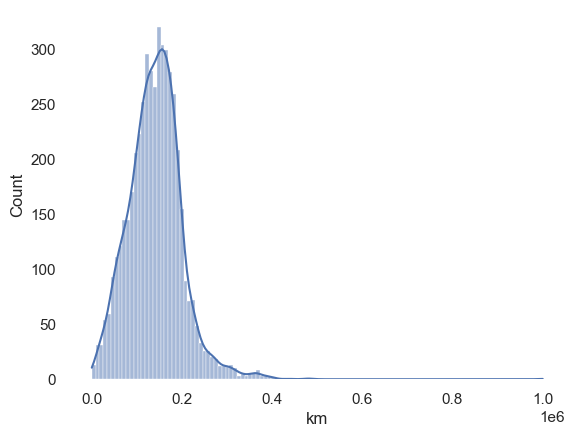

In [373]:
#tras una exploración visual de los datos, veo hay outliers por encima de los 600.000km (un coche con más de esos km es una anomali) por tanto eliminamos el registro. 
sns.histplot(data= df_bmw3, x = "km", kde= True)

<Axes: ylabel='km'>

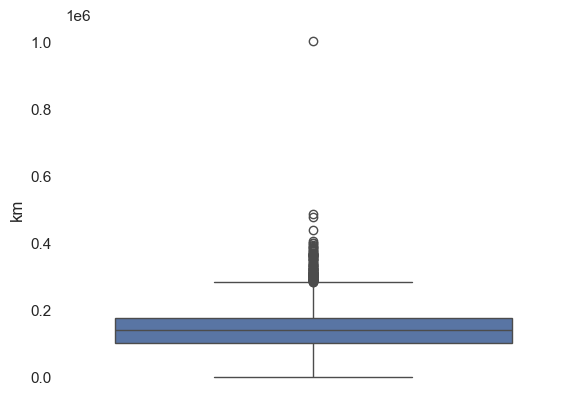

In [374]:
sns.boxplot(data=df_bmw3, y="km")

In [375]:
df_bmw3[df_bmw3["km"]> 500000]

,index,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo
3717,3732,1000376.0,90.0,2005-03-01,diesel,black,hatchback,True,False,False,False,False,True,False,1400.0,2018-06-01,1


In [376]:
#como es un unico valor atipico, lo elimino

df_bmw3.drop(df_bmw3[df_bmw3["km"]> 500000].index, inplace = True)


<Axes: xlabel='km', ylabel='Count'>

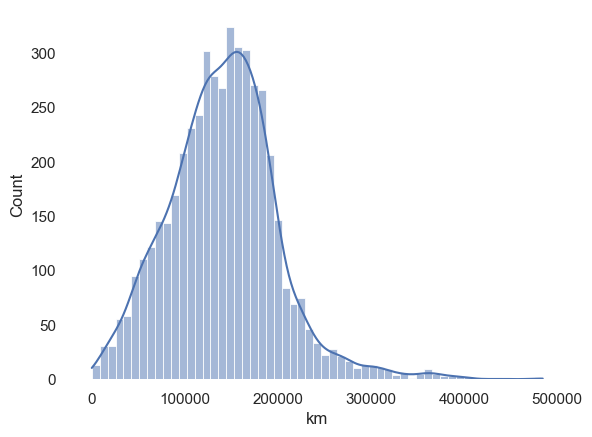

In [377]:
sns.histplot(data= df_bmw3, x = "km", kde= True)

<Axes: ylabel='km'>

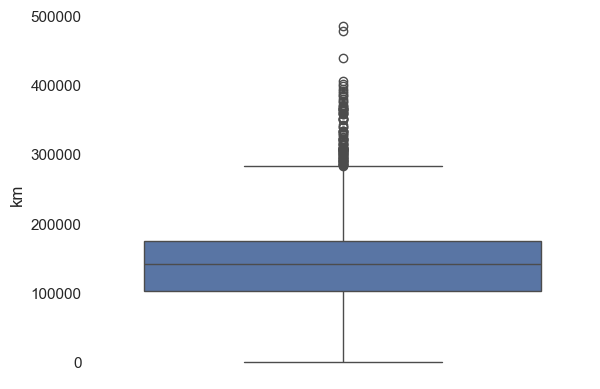

In [378]:
sns.boxplot(data=df_bmw3, y="km")

In [379]:
#también detecto un valor atípico para un coche, por tanto lo elimino

df_bmw3[df_bmw3["km"]<= 0]

,index,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo
2923,2938,-64.0,230.0,2012-11-10 21:32:25.785123957,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01,Otros


In [380]:
df_bmw3.drop(df_bmw3[df_bmw3["km"]<= 0].index, inplace = True)

In [381]:
df_bmw3[df_bmw3["km"]<= 0]

,index,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo


### 2.3.2 "potencia" y "categoria_potencia"

In [382]:
df_bmw3["potencia"].value_counts()

potencia
135.0    879
120.0    783
85.0     630
100.0    567
105.0    450
190.0    318
140.0    165
160.0    153
110.0    140
230.0    119
155.0     99
180.0     61
225.0     49
130.0     47
150.0     43
90.0      39
280.0     32
122.0     30
173.0     25
210.0     21
137.0     19
125.0     16
170.0     14
70.0      11
75.0       9
145.0      9
235.0      7
142.0      6
87.0       6
220.0      5
127.0      5
112.0      5
309.0      4
240.0      4
317.0      4
80.0       4
119.0      4
77.0       3
107.0      3
200.0      3
195.0      3
95.0       3
270.0      2
25.0       2
233.0      2
101.0      2
141.0      2
189.0      2
192.0      2
183.0      2
66.0       2
250.0      1
236.0      1
121.0      1
224.0      1
412.0      1
0.0        1
423.0      1
300.0      1
261.0      1
Name: count, dtype: int64

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

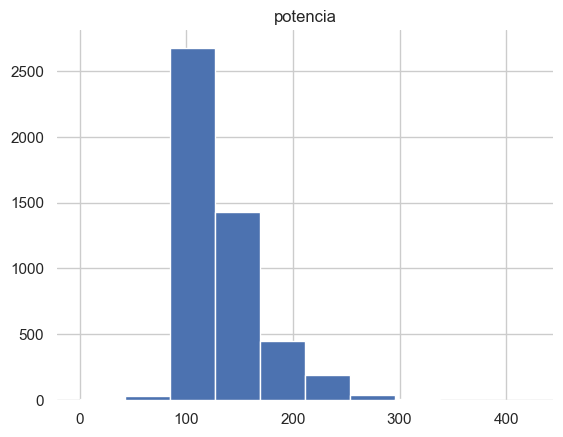

In [383]:
df_bmw3.hist("potencia")

In [384]:
#observo que hay algunos resultados que no pueden ser reales debido a la baja potencia de sus coches. 
# Tras una busqueda en internet veo que estos coches tienen más potencia de la que se indica y por tanto decido eliminar estos resultados

df_bmw3[df_bmw3["potencia"]< 60]

,index,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo
1783,1796,152328.0,25.0,2012-11-10 21:32:25.785123957,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,20300.0,2018-04-01,Otros
1911,1925,152470.0,25.0,2012-10-10 21:32:25.785123957,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,2018-03-01,Otros
3750,3765,81770.0,0.0,2014-10-01 00:00:00.000000000,diesel,white,suv,False,False,False,False,False,False,False,11700.0,2018-03-01,X


In [385]:
df_bmw3.drop(df_bmw3[df_bmw3["potencia"]< 60].index, inplace = True)

In [386]:
#observo que todos los resultados con una potencia superior a 300 son de la serie M, la serie de competición de BMW, y por tanto son valores lógicos que no debo eliminar

df_bmw3[df_bmw3["potencia"]>300]

,index,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,serie_modelo
1,1,13929.0,317.0,2012-09-12 21:32:25.785123957,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,Otros
63,67,29925.0,309.0,2012-11-10 21:32:25.785123957,petrol,silver,"[coupe, sedan]",True,True,False,True,True,True,True,47000.0,2018-04-01,Otros
68,72,69410.0,317.0,2015-02-01 00:00:00.000000000,petrol,white,convertible,True,True,False,False,True,True,True,53600.0,2018-03-01,Otros
69,73,170550.0,309.0,2012-10-10 21:32:25.785123957,petrol,grey,coupe,True,True,False,True,False,True,True,28000.0,2018-03-01,Otros
89,93,99283.0,309.0,2012-11-10 21:32:25.785123957,petrol,silver,"[coupe, sedan]",False,False,False,True,False,True,True,28600.0,2018-04-01,Otros
134,139,169970.0,309.0,2011-03-01 00:00:00.000000000,petrol,grey,coupe,True,True,False,True,False,True,True,35700.0,2018-08-01,Otros
2929,2944,33670.0,317.0,2014-03-01 00:00:00.000000000,petrol,blue,sedan,True,True,False,False,True,True,True,51200.0,2018-04-01,Otros
3077,3092,39250.0,317.0,2015-11-01 00:00:00.000000000,petrol,black,sedan,True,True,False,False,True,True,True,52400.0,2018-05-01,Otros
3586,3601,150187.0,412.0,2013-04-12 21:32:25.785123957,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01,Otros
4131,4146,2970.0,423.0,2016-04-01 00:00:00.000000000,petrol,red,suv,True,True,True,False,False,True,True,82400.0,2018-04-01,X


### 2.3.3 "fecha_registro"

In [387]:
#en el caso de la fecha de registro, creo que es interesante solo quedarnos con el año

df_bmw3["fecha_registro"] = df_bmw3["fecha_registro"].dt.year

In [388]:
df_bmw3["fecha_registro"].value_counts()

fecha_registro
2012    1885
2013    1712
2014     632
2015     161
2011     117
2010      51
2016      46
2008      43
2009      39
2007      29
2006      29
2005      27
2004      10
2003       9
2001       8
2017       5
2002       5
1997       4
2000       3
1999       3
1995       1
1990       1
1994       1
Name: count, dtype: int64

### 2.3.4. "tipo_gasolina"

In [389]:
df_bmw3["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4620
petrol            187
hybrid_petrol       6
Diesel              5
electro             3
Name: count, dtype: int64

In [390]:
df_bmw3.loc[df_bmw3["tipo_gasolina"] == "Diesel", "tipo_gasolina"] = "diesel"

In [391]:
df_bmw3.loc[df_bmw3["tipo_gasolina"] == "hybrid_petrol", "tipo_gasolina"] = "otros"
df_bmw3.loc[df_bmw3["tipo_gasolina"] == "electro", "tipo_gasolina"] = "otros"

In [392]:
df_bmw3["tipo_gasolina"].value_counts()

tipo_gasolina
diesel    4625
petrol     187
otros        9
Name: count, dtype: int64

### 2.3.5. "color"

In [393]:
df_bmw3["color"].value_counts()

color
black             1834
grey              1147
blue               656
white              483
brown              302
silver             290
red                 47
beige               37
green               14
orange               5
[black, grey]        4
[black, white]       1
[]                   1
Name: count, dtype: int64

In [394]:
df_bmw3["color"] = df_bmw3["color"].astype(str)

In [395]:
#agrupo todos los colores con menos de 200 resultados en otros

resultados_menores_a_200 = df_bmw3["color"].value_counts() < 200
lista_resultados3 = resultados_menores_a_200[resultados_menores_a_200].index.tolist()
print(lista_resultados3)

for valor in lista_resultados3:
    df_bmw3.loc[df_bmw3["color"] == valor, "color"] = "otros"

['red', 'beige', 'green', 'orange', "['black' 'grey']", "['black' 'white']", '[]']


In [396]:
df_bmw3["color"].value_counts()

color
black     1834
grey      1147
blue       656
white      483
brown      302
silver     290
otros      109
Name: count, dtype: int64

### 2.3.6 "tipo_coche"

In [397]:
df_bmw3["tipo_coche"].value_counts()

tipo_coche
estate                1816
suv                   1059
sedan                  954
hatchback              734
coupe                   91
subcompact              77
van                     38
convertible             36
[hatchback, sedan]       6
[hatchback, sedan]       5
[coupe, sedan]           3
[coupe, sedan]           2
Name: count, dtype: int64

In [398]:
df_bmw3["tipo_coche"] = df_bmw3["tipo_coche"].astype(str)

In [399]:
#agrupo todos los tipos con menos de 100 resultados en otros

resultados_menores_a_100 = df_bmw3["tipo_coche"].value_counts() < 100
lista_resultados4 = resultados_menores_a_100[resultados_menores_a_100].index.tolist()
print(lista_resultados4)

for valor in lista_resultados4:
    df_bmw3.loc[df_bmw3["tipo_coche"] == valor, "tipo_coche"] = "otros"

['coupe', 'subcompact', 'van', 'convertible', "['hatchback' 'sedan']", "['coupe' 'sedan']"]


In [400]:
df_bmw3["tipo_coche"].value_counts()

tipo_coche
estate       1816
suv          1059
sedan         954
hatchback     734
otros         258
Name: count, dtype: int64

2.3.7. variables booleanas ("volante_regulable", "aire_acoindiconado", "camara_trasera", "elevalunas_electrico", "bluetooth", "gps. "alerta_lim_velocitdad)

In [401]:
#no hago nada ya que como bools estan ok para proceder con el analisis

### 2.3.7 "fecha_venta"

In [402]:
#en el caso de la fecha de venta, también creo que es más interesante solo quedarnos con el año ya que es la variabe de tiempo que se usa para los coches

df_bmw3["fecha_venta"] = df_bmw3["fecha_venta"].dt.year

In [403]:
df_bmw3["fecha_venta"].value_counts()

fecha_venta
2018    4817
2007       1
2010       1
2009       1
2008       1
Name: count, dtype: int64

In [404]:
#observo que esta columna no nos aportara mucha información a nuestro modelo y por tanto decido eliminar

del df_bmw3["fecha_venta"]

In [405]:
df_bmw3 = df_bmw3.reset_index(drop=True)


In [406]:
del df_bmw3["index"]

In [407]:
#como de esta columna, sale gran parte de los resultados de "fecha_registro", 
#considero que el calculo que he hecho para la columna "fecha_registro" no es valido ya que hay poca representatividad de datos como para extrapolar una media de tiempo de venta del coche desde su registro
#por tanto, considero eliminar también "fecha_registro"

del df_bmw3["fecha_registro"]

In [408]:
pd.to_pickle(df_bmw2, "df_bmw_sin nulos_analisis_univariable_PICKLE")

In [409]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4821 non-null   float64
 1   potencia              4821 non-null   float64
 2   tipo_gasolina         4821 non-null   object 
 3   color                 4821 non-null   object 
 4   tipo_coche            4821 non-null   object 
 5   volante_regulable     4821 non-null   bool   
 6   aire_acondicionado    4821 non-null   bool   
 7   camara_trasera        4821 non-null   bool   
 8   elevalunas_electrico  4821 non-null   bool   
 9   bluetooth             4821 non-null   bool   
 10  gps                   4821 non-null   bool   
 11  alerta_lim_velocidad  4821 non-null   bool   
 12  precio                4821 non-null   float64
 13  serie_modelo          4821 non-null   object 
dtypes: bool(7), float64(3), object(4)
memory usage: 296.7+ KB


In [410]:
df_bmw3.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,serie_modelo
0,140411.0,100.0,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,1
1,13929.0,317.0,petrol,grey,otros,True,True,False,False,True,True,True,69700.0,Otros
2,183297.0,120.0,diesel,white,estate,False,False,False,True,False,True,False,10200.0,3
3,128035.0,135.0,diesel,otros,otros,True,True,False,True,True,True,True,25100.0,Otros
4,97097.0,160.0,diesel,silver,otros,True,True,False,False,True,True,True,33400.0,Otros


In [411]:
df_bmw3.describe()

,km,potencia,precio
count,4821.000000,4821.000000,4821.000000
mean,140964.085604,129.013898,15812.341838
std,58809.636809,38.850944,9181.444119
min,476.000000,66.000000,100.000000
25%,103095.000000,100.000000,10800.000000
50%,141089.000000,120.000000,14200.000000
75%,175263.000000,135.000000,18600.000000
max,484615.000000,423.000000,178500.000000


In [412]:
df_bmw3.isnull().sum()

km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
serie_modelo            0
dtype: int64

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel    4625
petrol     187
otros        9
Name: count, dtype: int64 

color 
 color
black     1834
grey      1147
blue       656
white      483
brown      302
silver     290
otros      109
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
estate       1816
suv          1059
sedan         954
hatchback     734
otros         258
Name: count, dtype: int64 

[[<Axes: title={'center': 'precio'}>]]
serie_modelo 
 serie_modelo
3        1793
5        1137
X        1061
1         562
Otros     268
Name: count, dtype: int64 



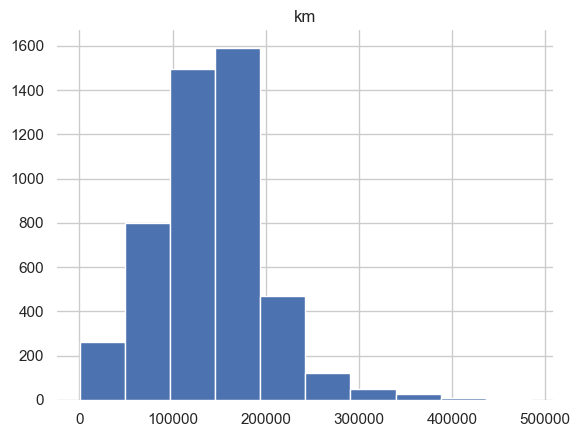

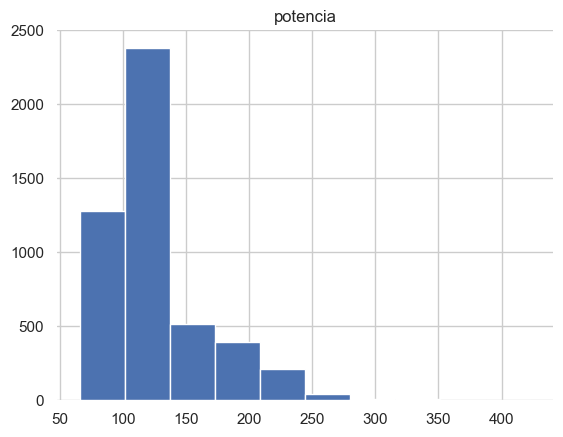

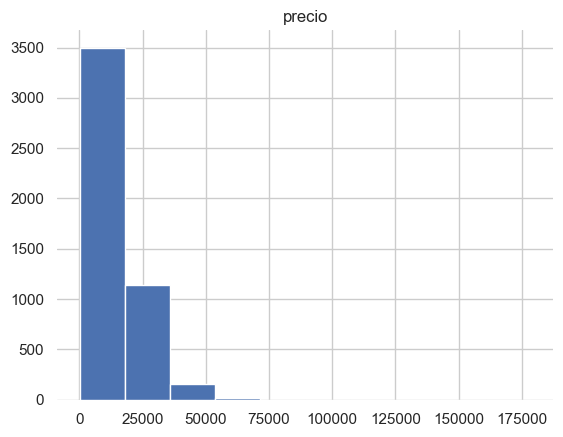

In [413]:
for i in df_bmw3:
  if df_bmw3[i].dtype.kind == "O":
    print(i,"\n", df_bmw3[i].value_counts(), "\n")
  elif (df_bmw3[i].dtype.kind=="f") or (df_bmw3[i].dtype.kind=="i"):
    print(df_bmw3.hist(i))

## 2.4 PREPROCESSING

In [414]:
df_bmw4 =df_bmw3.copy()

In [415]:
corr = df_bmw4.corr(numeric_only = True)

In [416]:
columna = df_bmw4.pop("precio")

df_bmw4.insert(0, "precio", columna)

In [417]:
#no detecto variables que expliquen lo mismo

corr = df_bmw4.corr(numeric_only = True)
corr.style.background_gradient(cmap= "coolwarm")

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad
precio,1.000000,-0.411841,0.640879,0.270618,0.224798,0.253771,0.264061,0.202049,-0.007572,0.434539
km,-0.411841,1.000000,-0.046375,0.063571,0.023432,0.003571,0.050218,-0.035328,0.158178,-0.021447
potencia,0.640879,-0.046375,1.000000,0.327370,0.182338,0.313321,0.341765,0.227912,0.006021,0.507898
volante_regulable,0.270618,0.063571,0.327370,1.000000,0.288284,0.254763,0.278557,0.134061,0.243431,0.244321
aire_acondicionado,0.224798,0.023432,0.182338,0.288284,1.000000,0.142059,0.257699,0.103576,0.340950,0.204952
camara_trasera,0.253771,0.003571,0.313321,0.254763,0.142059,1.000000,0.198231,0.132768,0.061421,0.196163
elevalunas_electrico,0.264061,0.050218,0.341765,0.278557,0.257699,0.198231,1.000000,0.237199,0.203291,0.338251
bluetooth,0.202049,-0.035328,0.227912,0.134061,0.103576,0.132768,0.237199,1.000000,0.117803,0.098513
gps,-0.007572,0.158178,0.006021,0.243431,0.340950,0.061421,0.203291,0.117803,1.000000,-0.054714
alerta_lim_velocidad,0.434539,-0.021447,0.507898,0.244321,0.204952,0.196163,0.338251,0.098513,-0.054714,1.000000


### 2.4.1 Analisis del target

<Axes: xlabel='precio', ylabel='Count'>

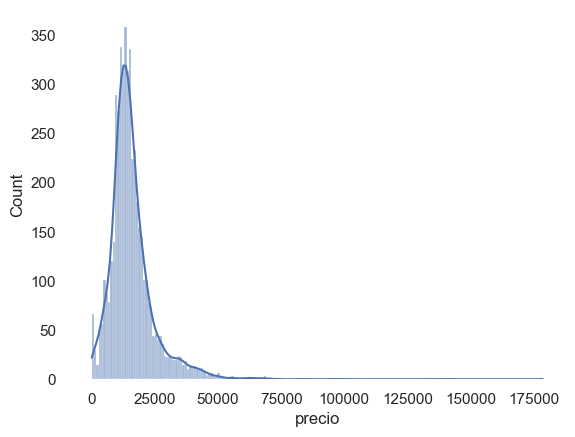

In [418]:
#se observa una distribución normal

sns.histplot(data= df_bmw3, x = "precio", kde= True)

<Axes: xlabel='precio'>

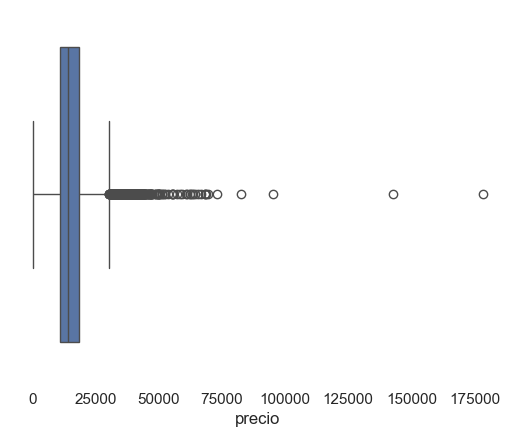

In [419]:
sns.boxplot(data= df_bmw3, x = "precio")

In [420]:
#aunque parezcan outliers, puede ser que haya modelos de la serie X de BMW que superen los 100.000€ y por tant0 no los elimino

df_bmw3[df_bmw3["precio"] > 100000]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,serie_modelo
4664,103222.0,140.0,diesel,grey,suv,True,True,False,True,False,True,True,142800.0,X
4733,72515.0,135.0,diesel,blue,suv,False,False,True,False,False,False,True,178500.0,X


### 2.4.2 Target vs Variables independientes

<Axes: xlabel='serie_modelo', ylabel='precio'>

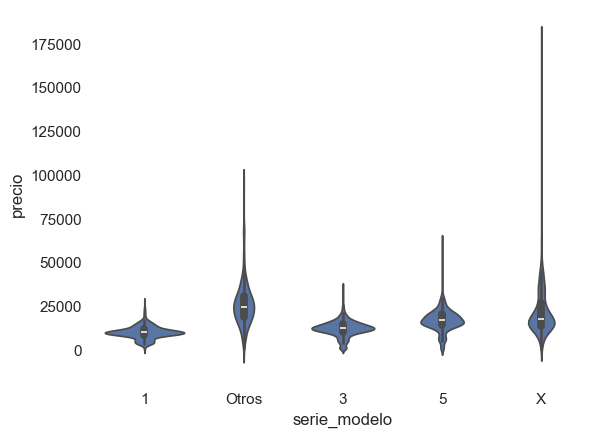

In [421]:
#target vs serie_modelo

sns.violinplot(x="serie_modelo", y= "precio", data = df_bmw4)

<Axes: xlabel='precio', ylabel='km'>

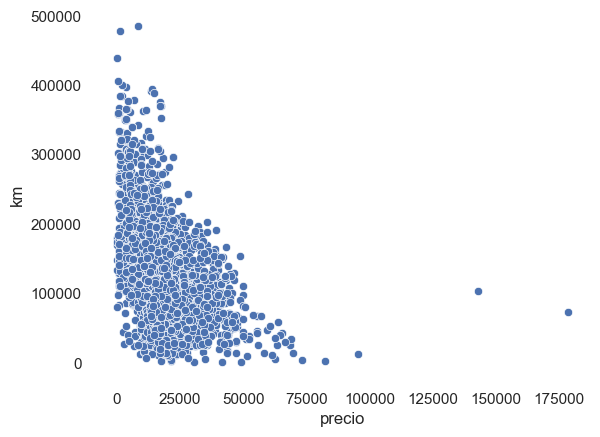

In [422]:
#target vs km

sns.scatterplot(x="precio", y = "km", data = df_bmw4)

<Axes: xlabel='km', ylabel='precio'>

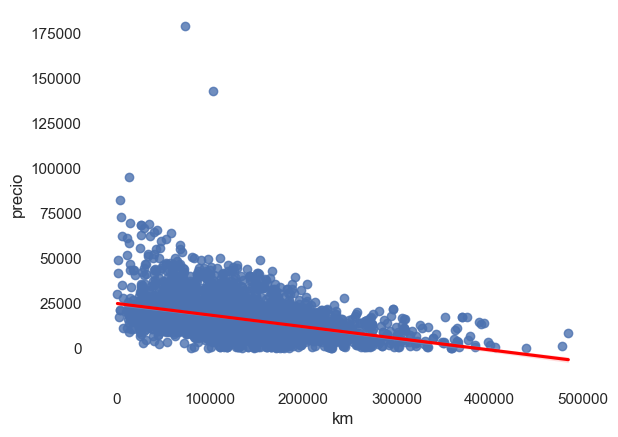

In [423]:
sns.regplot(x="km", y = "precio", data = df_bmw4, scatter = True, line_kws = {"color": "red"})

<Axes: xlabel='tipo_coche', ylabel='precio'>

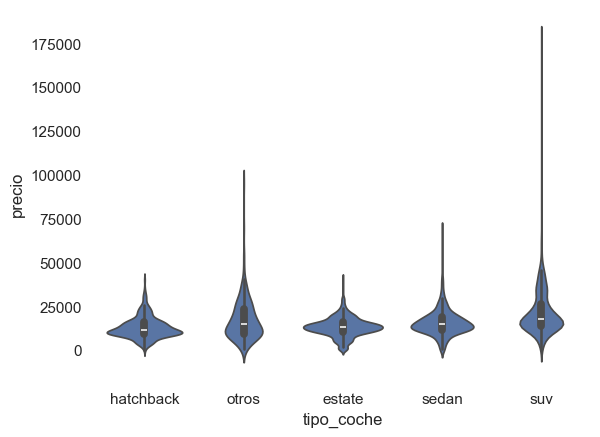

In [424]:
sns.violinplot(x="tipo_coche", y= "precio", data = df_bmw4)

<Axes: xlabel='tipo_gasolina', ylabel='precio'>

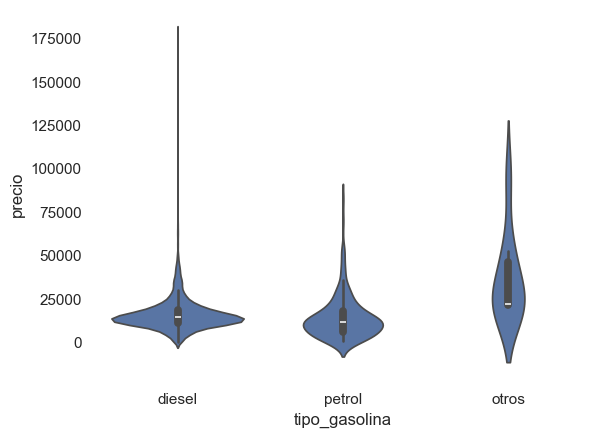

In [425]:
sns.violinplot(x="tipo_gasolina", y= "precio", data = df_bmw4)

<Axes: xlabel='color', ylabel='precio'>

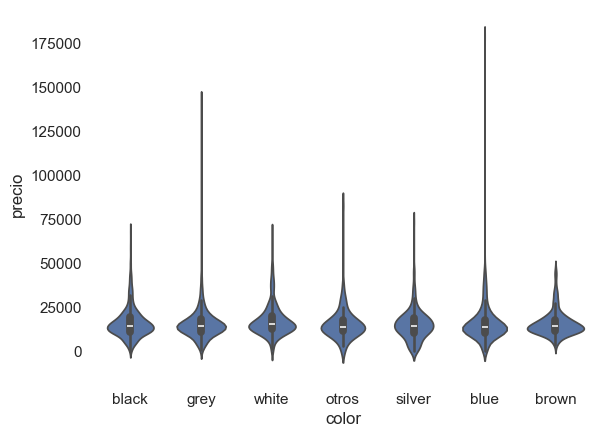

In [426]:
#target vs color
sns.violinplot(x="color", y= "precio", data = df_bmw4)


### 2.4.3 Transformación de variables categóricas a variables numéricas

In [427]:
df_bmw4.info()

#convierto todas las variables object  a numericas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio                4821 non-null   float64
 1   km                    4821 non-null   float64
 2   potencia              4821 non-null   float64
 3   tipo_gasolina         4821 non-null   object 
 4   color                 4821 non-null   object 
 5   tipo_coche            4821 non-null   object 
 6   volante_regulable     4821 non-null   bool   
 7   aire_acondicionado    4821 non-null   bool   
 8   camara_trasera        4821 non-null   bool   
 9   elevalunas_electrico  4821 non-null   bool   
 10  bluetooth             4821 non-null   bool   
 11  gps                   4821 non-null   bool   
 12  alerta_lim_velocidad  4821 non-null   bool   
 13  serie_modelo          4821 non-null   object 
dtypes: bool(7), float64(3), object(4)
memory usage: 296.7+ KB


In [428]:
target = ["precio", "log_precio"]

def obtener_lista_variables(ds):
    lista_numerica = []
    lista_boolean = []
    lista_categorica = []

    for i in ds:
        if (ds[i].dtype.kind == "f" or ds[i].dtype.kind == "i") and i not in target:
            lista_numerica.append(i)
        elif (ds[i].dtype.kind == "b") and i not in target:
            lista_boolean.append(i)
        elif (ds[i].dtype.kind == "O") and i not in target:
            lista_categorica.append(i)

    return lista_numerica, lista_boolean, lista_categorica

In [429]:
l_num, l_bool, l_cat = obtener_lista_variables(df_bmw4)

In [430]:
l_cat

['tipo_gasolina', 'color', 'tipo_coche', 'serie_modelo']

In [431]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio                4821 non-null   float64
 1   km                    4821 non-null   float64
 2   potencia              4821 non-null   float64
 3   tipo_gasolina         4821 non-null   object 
 4   color                 4821 non-null   object 
 5   tipo_coche            4821 non-null   object 
 6   volante_regulable     4821 non-null   bool   
 7   aire_acondicionado    4821 non-null   bool   
 8   camara_trasera        4821 non-null   bool   
 9   elevalunas_electrico  4821 non-null   bool   
 10  bluetooth             4821 non-null   bool   
 11  gps                   4821 non-null   bool   
 12  alerta_lim_velocidad  4821 non-null   bool   
 13  serie_modelo          4821 non-null   object 
dtypes: bool(7), float64(3), object(4)
memory usage: 296.7+ KB


In [432]:
#para todas las columnas categoricas con dtype object hago onehotencoding ya que todas son booleans y no tienen un peso asignado

df_bmw4 = pd.get_dummies(data= df_bmw4, columns = ["tipo_gasolina", "color", "tipo_coche", "serie_modelo"] , dtype = "int") 

In [433]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio                4821 non-null   float64
 1   km                    4821 non-null   float64
 2   potencia              4821 non-null   float64
 3   volante_regulable     4821 non-null   bool   
 4   aire_acondicionado    4821 non-null   bool   
 5   camara_trasera        4821 non-null   bool   
 6   elevalunas_electrico  4821 non-null   bool   
 7   bluetooth             4821 non-null   bool   
 8   gps                   4821 non-null   bool   
 9   alerta_lim_velocidad  4821 non-null   bool   
 10  tipo_gasolina_diesel  4821 non-null   int64  
 11  tipo_gasolina_otros   4821 non-null   int64  
 12  tipo_gasolina_petrol  4821 non-null   int64  
 13  color_black           4821 non-null   int64  
 14  color_blue            4821 non-null   int64  
 15  color_brown          

In [434]:
df_bmw5 = df_bmw4.copy()

In [435]:
#normalizo todas las variables entre 0 y 1

minMaxResultado = MinMaxScaler()

In [436]:
df_bmw5.head()


,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otros,tipo_coche_sedan,tipo_coche_suv,serie_modelo_1,serie_modelo_3,serie_modelo_5,serie_modelo_Otros,serie_modelo_X
0,11300.0,140411.0,100.0,True,True,False,True,False,True,False,...,0,1,0,0,0,1,0,0,0,0
1,69700.0,13929.0,317.0,True,True,False,False,True,True,True,...,0,0,1,0,0,0,0,0,1,0
2,10200.0,183297.0,120.0,False,False,False,True,False,True,False,...,1,0,0,0,0,0,1,0,0,0
3,25100.0,128035.0,135.0,True,True,False,True,True,True,True,...,0,0,1,0,0,0,0,0,1,0
4,33400.0,97097.0,160.0,True,True,False,False,True,True,True,...,0,0,1,0,0,0,0,0,1,0


In [437]:
df_bmw5[l_num] = minMaxResultado.fit_transform(df_bmw5[l_num])

In [438]:
columna = df_bmw5.pop("precio")

df_bmw5.insert(0, "precio", columna)

In [439]:
corr = df_bmw5.corr(numeric_only = True)
corr.style.background_gradient(cmap= "coolwarm")

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,tipo_gasolina_diesel,tipo_gasolina_otros,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_grey,color_otros,color_silver,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otros,tipo_coche_sedan,tipo_coche_suv,serie_modelo_1,serie_modelo_3,serie_modelo_5,serie_modelo_Otros,serie_modelo_X
precio,1.000000,-0.411841,0.640879,0.270618,0.224798,0.253771,0.264061,0.202049,-0.007572,0.434539,0.015001,0.097036,-0.037036,0.013132,-0.018913,-0.007508,-0.014998,-0.010753,-0.027261,0.054605,-0.213598,-0.130319,0.040008,0.014077,0.327777,-0.230041,-0.308512,0.058979,0.271875,0.327297
km,-0.411841,1.000000,-0.046375,0.063571,0.023432,0.003571,0.050218,-0.035328,0.158178,-0.021447,0.043666,-0.057739,-0.031753,0.034230,-0.022709,-0.022204,0.031629,-0.018483,0.027373,-0.068879,0.189146,-0.122209,-0.115095,0.065856,-0.116131,-0.123865,0.113382,0.172227,-0.173010,-0.117120
potencia,0.640879,-0.046375,1.000000,0.327370,0.182338,0.313321,0.341765,0.227912,0.006021,0.507898,-0.120647,0.036351,0.115269,0.025588,-0.000173,-0.054542,-0.005228,-0.015607,0.011362,0.008986,-0.056621,-0.248297,0.023166,0.031479,0.238842,-0.323604,-0.295527,0.206844,0.260357,0.239479
volante_regulable,0.270618,0.063571,0.327370,1.000000,0.288284,0.254763,0.278557,0.134061,0.243431,0.244321,0.003753,0.029469,-0.010426,0.005590,0.014927,0.039461,0.049233,-0.027872,-0.016600,-0.100807,0.011536,-0.173632,-0.021991,0.048567,0.102386,-0.242999,-0.206989,0.269865,0.092130,0.102216
aire_acondicionado,0.224798,0.023432,0.182338,0.288284,1.000000,0.142059,0.257699,0.103576,0.340950,0.204952,0.085837,0.008232,-0.089633,0.005869,0.000585,0.048226,0.030386,-0.031738,-0.036716,-0.047383,0.091502,-0.117746,-0.105058,0.061022,-0.006528,-0.208094,-0.033435,0.186692,0.029343,-0.007336
camara_trasera,0.253771,0.003571,0.313321,0.254763,0.142059,1.000000,0.198231,0.132768,0.061421,0.196163,-0.011847,-0.009737,0.014293,-0.000412,0.005845,-0.016704,0.010910,-0.020714,-0.000890,0.002961,-0.042440,-0.057348,-0.025196,0.002407,0.110814,-0.103457,-0.155304,0.099897,0.088083,0.110236
elevalunas_electrico,0.264061,0.050218,0.341765,0.278557,0.257699,0.198231,1.000000,0.237199,0.203291,0.338251,-0.003334,-0.011103,0.005892,0.063379,-0.031096,-0.021150,-0.015761,-0.031583,-0.032867,0.014115,0.050881,-0.102623,-0.018524,0.007212,0.032630,-0.189642,-0.158529,0.248454,0.082388,0.031682
bluetooth,0.202049,-0.035328,0.227912,0.134061,0.103576,0.132768,0.237199,1.000000,0.117803,0.098513,-0.031878,-0.010692,0.034995,0.017588,0.011540,-0.048328,-0.042164,0.016622,-0.016081,0.061688,-0.033869,0.018707,0.072704,-0.014562,-0.002103,-0.019373,-0.023585,-0.015855,0.113212,-0.003846
gps,-0.007572,0.158178,0.006021,0.243431,0.340950,0.061421,0.203291,0.117803,1.000000,-0.054714,0.048894,-0.007444,-0.048344,0.036357,0.006004,0.035691,0.028670,0.002182,-0.028899,-0.113302,0.044563,0.020174,-0.005499,0.042877,-0.107931,0.023442,0.001051,0.087676,0.000641,-0.109579
alerta_lim_velocidad,0.434539,-0.021447,0.507898,0.244321,0.204952,0.196163,0.338251,0.098513,-0.054714,1.000000,0.000252,0.028917,-0.006722,0.023183,-0.020965,-0.029522,0.002382,-0.018773,0.011499,0.007091,0.020661,-0.214595,-0.060550,0.044939,0.151704,-0.332938,-0.191116,0.264576,0.103501,0.152495


In [440]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio                4821 non-null   float64
 1   km                    4821 non-null   float64
 2   potencia              4821 non-null   float64
 3   volante_regulable     4821 non-null   bool   
 4   aire_acondicionado    4821 non-null   bool   
 5   camara_trasera        4821 non-null   bool   
 6   elevalunas_electrico  4821 non-null   bool   
 7   bluetooth             4821 non-null   bool   
 8   gps                   4821 non-null   bool   
 9   alerta_lim_velocidad  4821 non-null   bool   
 10  tipo_gasolina_diesel  4821 non-null   int64  
 11  tipo_gasolina_otros   4821 non-null   int64  
 12  tipo_gasolina_petrol  4821 non-null   int64  
 13  color_black           4821 non-null   int64  
 14  color_blue            4821 non-null   int64  
 15  color_brown          

In [441]:
df_bmw5.head(25)

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otros,tipo_coche_sedan,tipo_coche_suv,serie_modelo_1,serie_modelo_3,serie_modelo_5,serie_modelo_Otros,serie_modelo_X
0,11300.0,0.289039,0.095238,True,True,False,True,False,True,False,...,0,1,0,0,0,1,0,0,0,0
1,69700.0,0.027787,0.703081,True,True,False,False,True,True,True,...,0,0,1,0,0,0,0,0,1,0
2,10200.0,0.377621,0.151261,False,False,False,True,False,True,False,...,1,0,0,0,0,0,1,0,0,0
3,25100.0,0.263476,0.193277,True,True,False,True,True,True,True,...,0,0,1,0,0,0,0,0,1,0
4,33400.0,0.199573,0.263305,True,True,False,False,True,True,True,...,0,0,1,0,0,0,0,0,1,0
5,17100.0,0.313703,0.445378,True,True,False,True,True,True,True,...,0,0,1,0,0,0,1,0,0,0
6,12400.0,0.422901,0.221289,True,True,False,True,True,True,True,...,0,0,1,0,0,0,1,0,0,0
7,6100.0,0.237709,0.109244,True,True,False,False,True,True,False,...,0,0,1,0,0,1,0,0,0,0
8,6200.0,0.254906,0.165266,True,False,False,False,True,True,False,...,0,0,1,0,0,0,0,0,1,0
9,17300.0,0.287242,0.193277,False,False,False,True,False,True,False,...,0,0,1,0,0,0,1,0,0,0


In [442]:
df_bmw_final_50 = df_bmw5.head(50)

#df_bmw_final_50.to_excel("df_bmw_final_50.xlsx")